# Objective

The aim of this project is to analyze sentiment in financial news headlines, applying both traditional and machine learning-based Natural Language Processing (NLP) techniques to gain insights into market sentiment. The project categorizes news sentiment as positive, negative, or neutral and visualizes sentiment trends across financial news, which can be useful for investors, analysts, or financial institutions to inform their strategies.

**Data Source**
The dataset is sourced from Kaggle's "Sentiment Analysis for Financial News," which includes numerous financial news headlines labeled with sentiment. This dataset is downloaded and processed within the environment using kagglehub.


https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

**Data Cleaning and Preprocessing**

The data is cleansed by removing unnecessary characters, URLs, and mentions, and then converted to lowercase to maintain consistency.
Sentiment Analysis

Sentiment scoring is carried out in two ways:

TextBlob for polarity scoring, categorizing headlines as positive, negative, or neutral based on polarity score.
VADER Sentiment Analysis for additional sentiment insights, specifically tailored for short texts like news headlines.
Sentiment Categorization

Headlines are classified based on their polarity scores, allowing us to quantify the number of positive, negative, and neutral news items.
Topic Modeling with LDA

Topic modeling using Latent Dirichlet Allocation (LDA) is performed to uncover the main themes present in the dataset. This provides insights into the common topics discussed within different sentiment categories.

**Visualization**

Sentiment Distribution: Sentiment scores are visualized through histograms to show overall sentiment trends in the dataset.
Word Clouds: Positive and negative word clouds are generated to reveal common words within each sentiment category.
Word Associations: Network graphs visualize word associations in positive and negative sentiments to help understand keyword relationships within each sentiment category.

**Polarity and Subjectivity Analysis**

TextBlob is used to extract both polarity and subjectivity scores for each headline, allowing for a deeper understanding of how opinionated the content is.
Key Technologies Used
Python Libraries: pandas, re, textblob, matplotlib, seaborn, wordcloud, vaderSentiment, sklearn, and networkx.
NLP Techniques: Sentiment analysis, topic modeling with LDA, and text vectorization.
Insights and Applications
Sentiment Insights: The analysis provides a breakdown of sentiment across financial headlines, useful for tracking market mood and potential impacts on stock performance.


**Topic Trends:** Topic modeling reveals recurring themes, helping stakeholders identify the most talked-about sectors or events.
Investment Decision Support: By understanding sentiment and theme trends, investors can gauge overall market sentiment and make more informed financial decisions.


In [2]:
import pandas as pd
import kagglehub
import os
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import networkx as nx

**Data Acquisition**

Downloaded the "Sentiment Analysis for Financial News" dataset using kagglehub.

Listed the files in the dataset directory to confirm the necessary CSV file was available.

Loaded the dataset into a pandas DataFrame for analysis.

In [4]:
# Download latest version
path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

print("Path to dataset files:", path)

Path to dataset files: /Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/ankurzing/sentiment-analysis-for-financial-news/versions/5


In [5]:
# Define the directory path and list all files in the dataset directory
directory_path = '/Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/ankurzing/sentiment-analysis-for-financial-news/versions/5'
files = os.listdir(directory_path)
print("Files in dataset directory:", files)

Files in dataset directory: ['FinancialPhraseBank', 'all-data.csv']


In [6]:
# Load the dataset
file_path = os.path.join(directory_path, 'all-data.csv')
data = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=',')

In [7]:
print(data.head())

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


In [8]:
# Display the first few rows of the DataFrame
data.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [9]:
# Check the shape of the DataFrame
print(data.shape)

# Display the column names
print(data.columns)

(4845, 2)
Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')


**Data Preprocessing**

Defined the main text column and checked for any missing values, dropping rows where necessary.

Created a clean_text function to preprocess the data by:

Removing URLs, mentions, and hashtags.

Converting all text to lowercase.

Applied the clean_text function to clean the headlines and improve accuracy for the subsequent analysis.

In [11]:
# Check for missing values in the text column 
text_column_name = 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'  
missing_values = data.isnull().sum()
print("Missing values:", missing_values)

Missing values: neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64


In [12]:
# Check for missing values and drop rows with NaN in the text column
data.dropna(subset=[text_column_name], inplace=True)

**Sentiment Scoring**

TextBlob Analysis:
Used TextBlob to calculate polarity scores, assigning a sentiment score between -1 (negative) and 1 (positive) to each headline.

Sentiment Categorization:
Developed a function to categorize each score as 'Positive,' 'Negative,' or 'Neutral' based on the polarity value.

VADER Analysis:
Applied VADER’s Sentiment Analyzer to calculate compound sentiment scores for each headline, providing a cross-validation check for the initial sentiment results.

In [14]:
# Function to clean text data
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the specified text column
data['cleaned_text'] = data[text_column_name].apply(clean_text)

In [15]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

In [16]:
# Apply the sentiment function to the cleaned text
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

In [17]:
# Categorize sentiment scores into positive, negative, and neutral
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

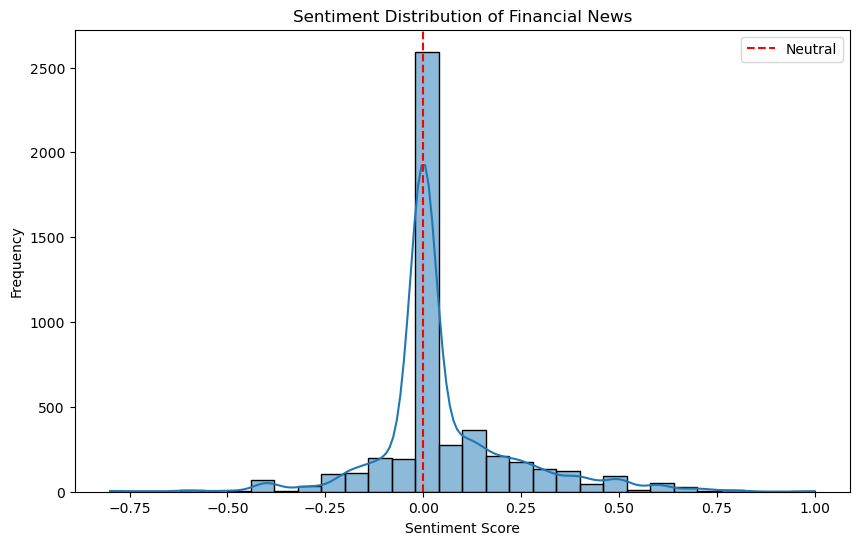

In [18]:
# Visualization of sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Financial News')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')  # Adding a line for neutral sentiment
plt.legend()
plt.show()

The distribution appears to be roughly bell-shaped, with a peak around the neutral sentiment score (0). This suggests that most financial news articles have a neutral sentiment.

Sentiment Categories:

-The vertical red line at 0 represents the neutral sentiment.

-The area to the right of the line represents positive sentiment.

-The area to the left represents negative sentiment.

In [20]:
# Display the sentiment categories count
sentiment_counts = data['sentiment_category'].value_counts()
print("Sentiment category counts:\n", sentiment_counts)

Sentiment category counts:
 sentiment_category
Neutral     2466
Positive    1616
Negative     763
Name: count, dtype: int64


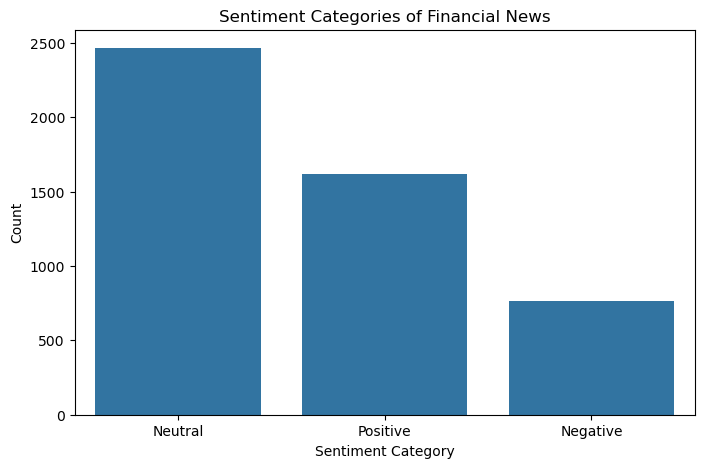

In [21]:
# Visualization of sentiment categories
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Categories of Financial News')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Word Cloud Visualization

Generated word clouds for both positive and negative sentiment categories to visualize commonly appearing words.
Allowed for easy visual identification of words frequently associated with each sentiment.

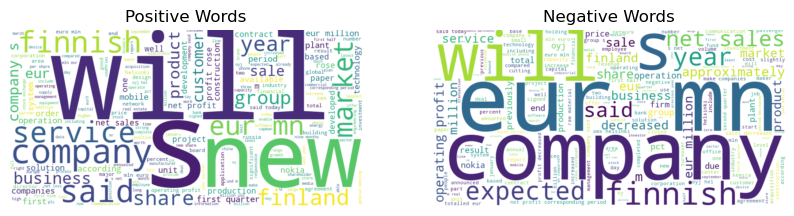

In [23]:
positive_words = ' '.join(data[data['sentiment'] > 0]['cleaned_text'])
negative_words = ' '.join(data[data['sentiment'] < 0]['cleaned_text'])

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Positive Words")
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative Words")
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(negative_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [24]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score
def vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

data['vader_sentiment'] = data['cleaned_text'].apply(vader_sentiment)

**Topic Modeling with LDA**

Vectorized the cleaned text data using CountVectorizer, removing common English stop words.
Used Latent Dirichlet Allocation (LDA) with five topics to identify prevalent themes within the financial news headlines.
Displayed the top keywords for each topic to uncover the main themes in the dataset.

In [26]:
# Vectorize text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_data = vectorizer.fit_transform(data['cleaned_text'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(text_data)

# Display topics
for i, topic in enumerate(lda.components_):
    print(f"Topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Topic #0:
['board', '2010', '000', 'stock', 'new', 'capital', 'total', 'share', 'company', 'shares']
Topic #1:
['networks', 'new', 'use', 'mobile', 'company', 'financial', 'service', 'oil', 'services', 'said']
Topic #2:
['period', 'mln', 'operating', 'year', 'profit', 'net', 'million', 'sales', 'mn', 'eur']
Topic #3:
['production', 'new', 'construction', 'contract', 'services', 'said', 'finnish', 'business', 'finland', 'company']
Topic #4:
['business', 'nokia', 'mobile', 'helsinki', 'finland', 'group', 'oyj', 'said', 'finnish', 'company']


# Word Association Graphs

Created word association graphs for the top 50 words in positive and negative sentiment categories using networkx.
Visualized relationships between words, providing additional context around common words within each sentiment type.

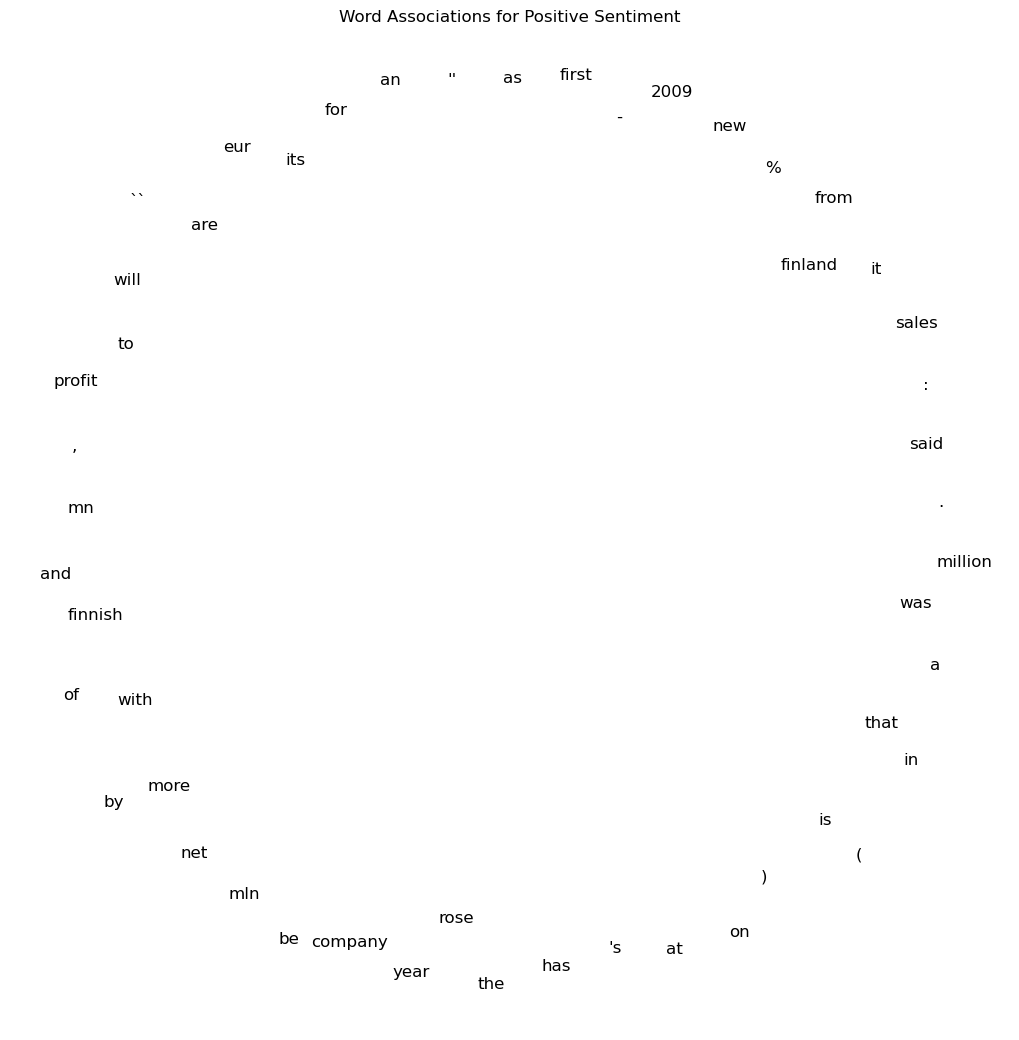

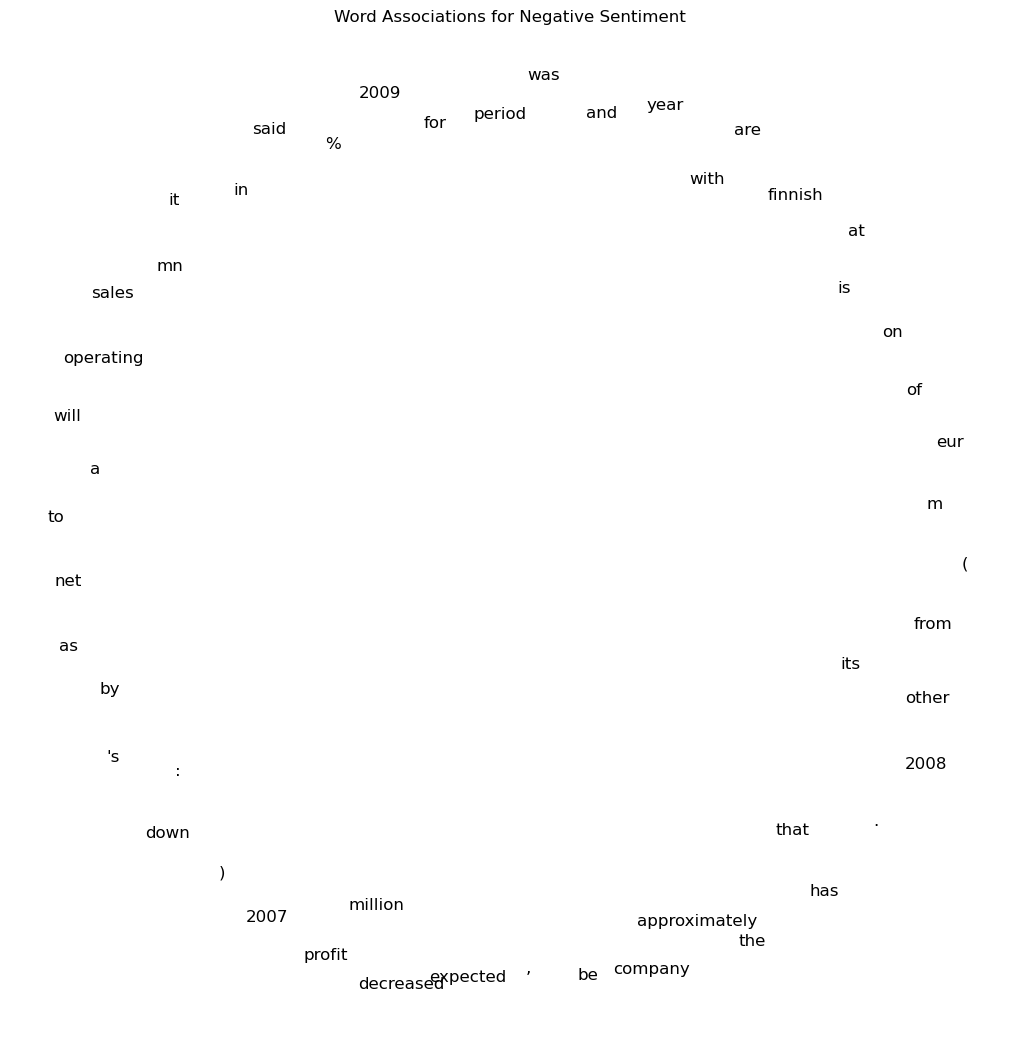

In [28]:
def plot_word_association(texts, sentiment):
    word_counter = Counter(" ".join(texts).split())
    word_graph = nx.Graph()
    for word, count in word_counter.most_common(50):
        word_graph.add_node(word, size=count)
    plt.figure(figsize=(10, 10))
    nx.draw(word_graph, with_labels=True, node_size=[v * 100 for v in dict(word_graph.degree).values()])
    plt.title(f"Word Associations for {sentiment} Sentiment")
    plt.show()

plot_word_association(data[data['sentiment'] > 0]['cleaned_text'], "Positive")
plot_word_association(data[data['sentiment'] < 0]['cleaned_text'], "Negative")

# Conclusion

Through sentiment analysis, topic modeling, and visualization, this project highlighted important insights into the sentiment trends within financial news:

Sentiment Trends: Financial news tends to be either neutral or slightly positive, indicating cautious optimism in the industry.
Topic Insights: LDA topic modeling revealed consistent themes in financial news, such as company performance, market forecasts, and economic policies.
Word Association: Word association graphs showed relationships between words in positive and negative sentiments, identifying key phrases around market changes and industry trends.
Application in Finance: These insights provide valuable information for investors and analysts, helping inform trading and investment decisions based on sentiment trends.
This project demonstrates how traditional NLP methods combined with advanced modeling can provide actionable insights, offering valuable sentiment analysis for the financial sector.